In [1]:
import torch 
from torchvision.models import resnet50,ResNet50_Weights,resnet152,ResNet152_Weights
import torchvision
import os
os.environ['TORCH_HOME']=r"D:\torch_model"
from d2l import torch as d2l
from torch.utils.data import DataLoader,Dataset,Subset

transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[.5, .5, .5], std=[.5, .5, .5]),
])
dataset=torchvision.datasets.ImageFolder(root=r'D:\project_meta\NNproject\NNI\output\video_frames\LEVEL',transform=transforms)

from sklearn.model_selection import train_test_split
import datetime
indexs=torch.tensor(range(len(dataset)))
train_dataset_index,test_dataset_index=train_test_split(indexs,test_size=0.3,shuffle=False)
train_dataset=Subset(dataset=dataset,indices=train_dataset_index)
test_dataset=Subset(dataset=dataset,indices=test_dataset_index)
train_dataloader=DataLoader(train_dataset,batch_size=128)
test_dataloader=DataLoader(test_dataset,batch_size=256)

timer, num_batches = d2l.Timer(), len(train_dataloader)

In [25]:
classnum={}

for data in iter(train_dataset):
    
    if str(data[1]) in classnum.keys():
        classnum[f'class_str(data[1])']=1
    else:
        classnum[f'class_str(data[1])']=classnum[f'class_str(data[1])']+1
    print(classnum[f'class_str(data[1])'])
print(classnum)

KeyError: 'class_str(data[1])'

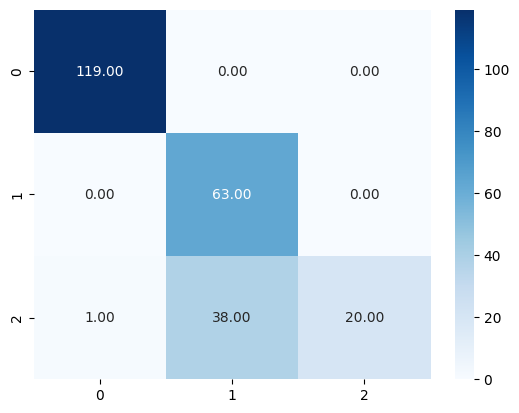

In [2]:

test_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[.5, .5, .5], std=[.5, .5, .5]),
])
test_dataset=torchvision.datasets.ImageFolder(root=r'D:\project_meta\NNproject\NNI\output\video_frames\IDSplite\test',transform=test_transforms)

from sklearn.metrics import confusion_matrix
import numpy as np
import torch
torch.cuda.empty_cache()
device=torch.device('cpu')
net=resnet50(weights=ResNet50_Weights.DEFAULT).to(device)
net.eval()
with torch.no_grad():
    num_classes=3
    test_dataloader=DataLoader(test_dataset,batch_size=128)
    confusion_matrix_test = np.zeros((num_classes, num_classes))
    net.load_state_dict(torch.load(r"D:\project_meta\NNproject\NNI\output\model_parameter\FaceDetect\2023_11_16_08_17_55\0.8381742738589212.pt"))
    # net.load_state_dict(torch.load(r"D:\project_meta\NNproject\NNI\output\model_parameter\FaceDetect\2023_11_15_18_48_50\0.5477178423236515.pt"))
    for data_dict in test_dataloader:
        x=data_dict[0].to(torch.float32).to(device)
        y=data_dict[1].long().to(device)
        y_hat=net(x)
        pre=torch.argmax(y_hat.detach().cpu(),dim=1)
        num_true=sum(pre==y.cpu())
        y_pred = torch.stack((pre, y.cpu()), dim=1)
        confusion_matrix_test += confusion_matrix(y_pred[:, 1], y_pred[:, 0], labels=range(num_classes))
    import seaborn as sns
    sns.heatmap(confusion_matrix_test,annot=True, fmt=".2f", cmap="Blues")

In [ ]:
import torch
import torchvision
from torchvision import transforms, models
import numpy as np
from PIL import Image

In [4]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[.5, .5, .5], std=[.5, .5, .5]),
])

In [6]:
def predict_image_classification(image_path, model):
    # 加载图像
    image = Image.open(image_path)
    # 应用变换
    image_tensor = transforms(image).float()
    # 增加一个维度，因为模型需要一个批次(batch)的输入(batch size=1)
    image_tensor = image_tensor.unsqueeze_(0)
    # 将图像传递给模型进行预测
    output = model(image_tensor)
    # 获取输出张量中最大元素的索引，即预测输出类别
    index = output.data.numpy().argmax()
    return index

In [ ]:
image_path = 'path/to/image.jpg'
index = predict_image_classification(image_path,net)
print(index)